In [1]:
import numpy as np
class NeuralNetwork:
    # 生长函数及其倒数
    def logistic(self,x):
        return 1/(1 + np.exp(-x))
    def logistic_derivative(self,x):
        return self.logistic(x)*(1-self.logistic(x))
    #定义双曲函数及其导数
    def tanh(self,x):
        return np.tanh(x)
    def tanh_deriv(self,x):
        return 1.0 - np.tanh(x)**2
    
    #初始化，layes表示的是一个list，如[10,5,2]表示第一层10个神经元
    #第二层5个神经元，第三层2个神经元。至少2层
    def __init__(self, layers, activation='tanh'):
        if activation == 'logistic':
            self.activation = self.logistic
            self.activation_deriv = self.logistic_derivative
        elif activation == 'tanh':
            self.activation = self.tanh
            self.activation_deriv = self.tanh_deriv
        self.weights = []
        #从第二层开始，前后节点连接权重的初始化。因为第0层为输入，最后层输出
        for i in range(len(layers) - 1):
            #对当前节点的前趋赋值,为使权重有正有负号，均衡一点，所以采用下面公式
            #分布在-1到+1之间
            #np.random.random((n,m)),产生n*m矩阵，每个数是0-1随机小数，
            # *2后，成为0-2之间，再-1，变成-1到+1之间。
            if i==0: # 输入层，加偏置
                w=2*np.random.random((layers[i]+1 , layers[i + 1]))-1
                self.weights.append(w*0.5)
            else:
                w=2*np.random.random((layers[i] , layers[i + 1]))-1
                self.weights.append(w*0.5)
                
    
    #训练函数，X矩阵，每行是一个样本的特征 ，y是其对应的分类，learning_rate 学习速率，
    # epochs，神经网络进行学习的最大次数
    def fit(self, X, y, learning_rate=0.2, epochs=10000):
        #X = np.atleast_2d(X) #确定X至少是二维的数据
        temp = np.ones(X.shape[0]) #初始化矩阵，+1列为bias
       
        X = np.c_[X,temp]
        for k in range(epochs):
            #随机选取一行，对神经网络进行更新
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            #完成所有正向的更新
            for j in range(len(self.weights)):
                a.append(self.activation(np.dot(a[j], self.weights[j])))
            error = y[i] - a[-1]
            deltas = [error * self.activation_deriv(a[-1])]

            #开始反向误差传播，更新权重
            for j in range(len(a) - 2, 0, -1): # 从倒数第2层到开始层
                deltas.append(deltas[-1].dot(self.weights[j].T)*self.activation_deriv(a[j]))
            deltas.reverse()
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

                #预测函数
    def predict(self, x):
        temp = np.ones(x.shape[0])
        x=np.c_[x,temp]
        ans=[]
        for a in x:
            for w in self.weights:
                a = self.activation(np.dot(a, w))
            ans.append(np.argmax(a))
        return ans
                #预测函数
    def predict1(self, x):
        temp = np.ones(x.shape[0])
        x=np.c_[x,temp]
        ans=[]
        for a in x:
            for w in self.weights:
                a = self.activation(np.dot(a, w))
            #ans.append(a[0])
            ans.append(np.argmax(a))  #对分类问题，用此语句

        return ans

1


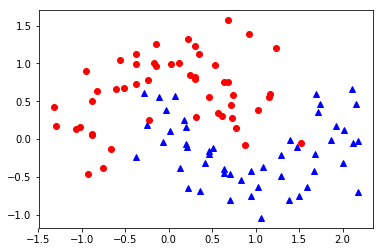

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# from neuralNetwork import NeuralNetwork

X=np.loadtxt(r"/home/ap_tech/Documents/Python/1x0.txt")
y=np.loadtxt(r"/home/ap_tech/Documents/Python/1y0.txt")
print(1)
from pylab import *
plot(X[y==1,0],X[y==1,1],'b^')
plot(X[y!=1,0],X[y!=1,1],'ro')
show()

#Data packet preprocessing, between 1~1
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.1)
aver=Xtrain.mean(axis=0)
Xtrain-=aver
Xtemp=np.abs(Xtrain)
colmax=Xtemp.max(axis=0)
Xtrain/=colmax

Xtest-=aver
Xtest/=colmax

#Orthogonalization of classification information
labelstrain = []
for i in range(len(ytrain)):
    one=2*[0]
    if ytrain[i]==0:
        one[0]=1
    else:
        one[1]=1
    labelstrain.append(one)
labelstrain=np.array(labelstrain)


0.9
[ 0.  1.  0.  0.  1.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  0.  1.
  1.  1.  1.  0.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.
  1.  0.  1.  0.]
[ 1.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  1.  1.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  0.  1.  1.  0.  1.  0.  1.  1.  0.  0.  0.  1.  0.
  1.  0.  1.  0.]


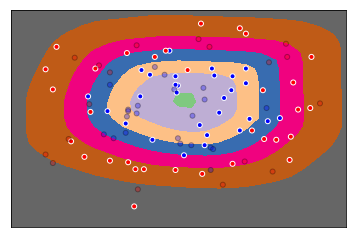

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

X=np.loadtxt(r"/home/ap_tech/Documents/Python/1x1.txt")
y=np.loadtxt(r"/home/ap_tech/Documents/Python/1y1.txt")

X = StandardScaler().fit_transform(X)    # X preprocessing column mean=0, variance=1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
clf=MLPClassifier(hidden_layer_sizes=(100,), random_state=7)
clf.fit(X_train, y_train)#Modeling
score = clf.score(X_test, y_test)
print(score)
yhat=clf.predict(X_test)
print(yhat) # Predictive value
print(y_test)

# Prepare 3D maps for making grid points
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
h = .2  
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cm = plt.cm.Accent
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()]) [:, 0] # Select the first type of probability output

# Contour map of probability
Z = Z.reshape(xx.shape)
ax = plt.subplot(1, 1, 1)
ax.contourf(xx, yy, Z, cmap=cm)

# Painting training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='white', s=25)

# Draw test set points 
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3, edgecolors='black', s=25)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.show()

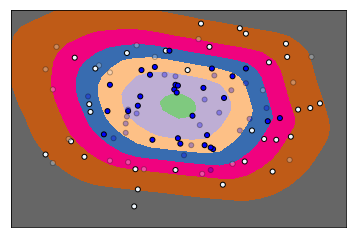

In [5]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
cm = plt.cm.Accent
cm_bright = ListedColormap(['#F0F8FF', '#0000FF'])

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()]) [:, 0] # Select the first type of probability output
# Contour map of probability
Z = Z.reshape(xx.shape)
ax = plt.subplot(1, 1, 1)
ax.contourf(xx, yy, Z, cmap=cm) 
# Painting training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='black', s=25)
# Draw test set points 
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3, edgecolors='black', s=25)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
plt.show()